In [ ]:
import os
import zipfile

# unzip dataset yang masih berbentuk file zip
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/dataset_hewan.zip", 'r')
zip_ref.extractall("./")
zip_ref.close()

(1080, 1080, 3)

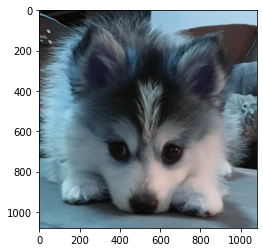

In [ ]:
import matplotlib.pyplot as plt
import cv2
gambar = cv2.imread('/content/dataset_hewan/Dogs/Image_30.jpg')
plt.imshow(gambar)
gambar.shape

In [ ]:
import glob
import cv2
x=[]
y=[]

for nama_gambar in glob.glob('/content/dataset_hewan/Birds/*.jpg'):
  gambar = cv2.imread(nama_gambar)
  try:
    gambar = cv2.resize(gambar,(100, 100))/255
  except:
    break
  x.append(gambar)
  y.append(0)

for nama_gambar in glob.glob('/content/dataset_hewan/Cats/*.jpg'):
  gambar = cv2.imread(nama_gambar)
  try:
    gambar = cv2.resize(gambar,(100, 100))/255
  except:
    break
  x.append(gambar)
  y.append(1)
  
for nama_gambar in glob.glob('/content/dataset_hewan/Dogs/*.jpg'):
  gambar = cv2.imread(nama_gambar)
  try:
    gambar = cv2.resize(gambar,(100, 100))/255
  except:
    break
  x.append(gambar)
  y.append(2)

for nama_gambar in glob.glob('/content/dataset_hewan/Horses/*.jpg'):
  gambar = cv2.imread(nama_gambar)
  try:
    gambar = cv2.resize(gambar,(100, 100))/255
  except:
    break
  x.append(gambar)
  y.append(3)

for nama_gambar in glob.glob('/content/dataset_hewan/Rabits/*.jpg'):
  gambar = cv2.imread(nama_gambar)
  try:
    gambar = cv2.resize(gambar,(100, 100))/255
  except:
    break
  x.append(gambar)
  y.append(4)

In [ ]:
import random
import numpy as np
z = list(zip(x,y))
random.shuffle(z)
x,y = zip(*z)
x = np.asarray(x)
y = np.asarray(y)

In [ ]:
print(x.shape)
print(y.shape)

(5100, 100, 100, 3)
(5100,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(8,(3,3), input_shape=x.shape[1:],activation='relu')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5,activation='softmax'))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 98, 98, 8)         224       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 49, 49, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 47, 47, 16)        1168      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 10, 10, 32)      

In [ ]:
history = model.fit(x,y, batch_size=1, epochs=15, validation_split=0.2)

Epoch 1/15
4080/4080 [==============================] - 59s 14ms/step - loss: 1.2920 - accuracy: 0.4007 - val_loss: 1.1564 - val_accuracy: 0.4696
Epoch 2/15
4080/4080 [==============================] - 55s 14ms/step - loss: 1.1344 - accuracy: 0.5103 - val_loss: 1.0867 - val_accuracy: 0.5186
Epoch 3/15
4080/4080 [==============================] - 54s 13ms/step - loss: 1.0246 - accuracy: 0.5772 - val_loss: 1.0837 - val_accuracy: 0.5500
Epoch 4/15
4080/4080 [==============================] - 56s 14ms/step - loss: 0.8745 - accuracy: 0.6478 - val_loss: 0.9555 - val_accuracy: 0.6059
Epoch 5/15
4080/4080 [==============================] - 55s 14ms/step - loss: 0.7373 - accuracy: 0.7135 - val_loss: 0.9635 - val_accuracy: 0.6127
Epoch 6/15
4080/4080 [==============================] - 60s 15ms/step - loss: 0.5571 - accuracy: 0.7885 - val_loss: 1.0248 - val_accuracy: 0.6235
Epoch 7/15
4080/4080 [==============================] - 61s 15ms/step - loss: 0.4432 - accuracy: 0.8414 - val_loss: 1.1727 -

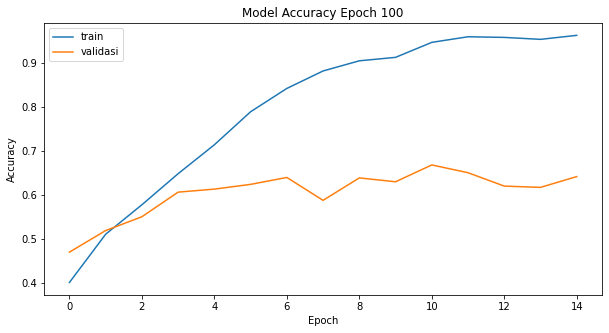

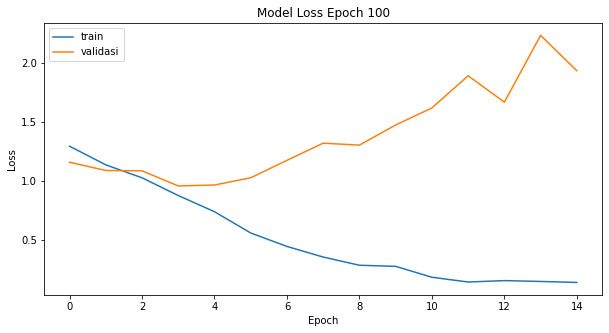

In [ ]:
import matplotlib.pyplot as plt
# Grafik Model Akurasi
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Epoch 100')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show()
# Grafik Model Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Epoch 100')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('function_64.h5')

In [ ]:
model.load_weights('/content/function_64.h5')

In [ ]:
x_test=[]
gambar=cv2.imread('/content/dataset_hewan/Horses/Image_123.jpg')
gambar=cv2.resize(gambar,(100,100))/255
x_test.append(gambar)
x_test = np.asarray(x_test)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred


1/1 [==============================] - 0s 49ms/step


array([3])

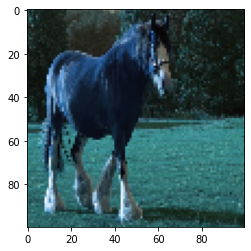

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(gambar)